In [1]:
# Importing required libraries for our project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Will be importing our data set over here

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#Cache_dir means where to download the data untar means unzipping.
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


228813984/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
# To ease in using the images that we have downloaded We will be using pathlib

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
# we'll list our images and count them

image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
# For example we need roses

roses= list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/12238827553_cf427bfd51_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5249439791_196b4e7fc7.jpg'),
 PosixPath('datasets/flower_photos/roses/2364976562_a184463083_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8063462557_e0a8bd6c64_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1645761726_2b1be95472.jpg')]

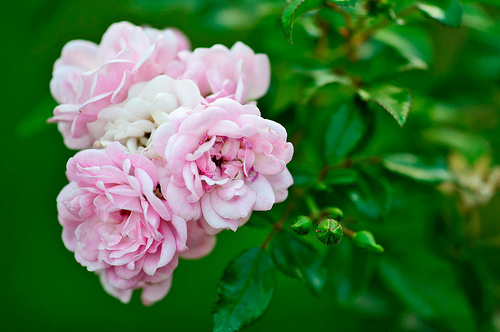

In [7]:
# We will look at our first roses image

PIL.Image.open(str(roses[1]))

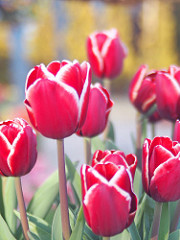

In [8]:
# For tulips

tulips= list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))


In [9]:
# Let's create a dictionary to add all of these flowers at once, instead of doing it separately

flowers_images_dict = { 'roses': list(data_dir.glob('roses/*')),
                        'daisy': list(data_dir.glob('daisy/*')),
                        'dandelion': list(data_dir.glob('dandelion/*')),
                        'sunflowers': list(data_dir.glob('sunflowers/*')),
                        'tulips': list(data_dir.glob('tulips/*'))}


In [10]:
# Let's create a dictionary, which contains the labels and the corresponding numbers starting from zero as their index

flowers_labels_dict = { 'roses': 0,
                        'daisy': 1,
                        'dandelion': 2,
                        'sunflowers': 3,
                        'tulips': 4}
#

In [11]:
# Let's read our image of roses for example, to check its shape

str(flowers_images_dict['roses'][0])
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(254, 320, 3)

In [12]:
# Let's resize our images using cv2

cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [13]:
# Now we will be discussing about X and y along with their training and testing

X, y = [], []
# We will look through our flowers image dictionary and fetch the items and put them in the variables of flower_name and images
for flower_name, images in flowers_images_dict.items():
  #From here will be assisting our images and the labels to be appended in X and Y
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [14]:
# Now we Convert both of our x and y to numpy arrays

X= np.array(X)
y= np.array(y)

In [15]:
# Here we will convert them into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
# Now all our values are not standardized, that is to be changed
# We will only divide X_train and X_test by 255 as they are images

X_train_scaled = X_train/255
X_test_scaled = X_test/25

# Here we define the Img height and weight
img_height = X_train_scaled[0].shape[1]
img_width = X_train_scaled[0].shape[2]

In [21]:
# Here we will create our sequential CNN model

num_classes=5
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

# we will compile our model here and use SparseCategoricalCrossentropy for direct values

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 10s 107ms/step - loss: 1.2943 - accuracy: 0.4400
Epoch 2/30
86/86 [==============================] - 9s 102ms/step - loss: 0.9670 - accuracy: 0.6275
Epoch 3/30
86/86 [==============================] - 9s 100ms/step - loss: 0.7945 - accuracy: 0.6966
Epoch 4/30
86/86 [==============================] - 9s 102ms/step - loss: 0.6314 - accuracy: 0.7609
Epoch 5/30
86/86 [==============================] - 9s 103ms/step - loss: 0.4238 - accuracy: 0.8586
Epoch 6/30
86/86 [==============================] - 9s 101ms/step - loss: 0.3030 - accuracy: 0.8903
Epoch 7/30
86/86 [==============================] - 9s 101ms/step - loss: 0.1859 - accuracy: 0.9393
Epoch 8/30
86/86 [==============================] - 9s 104ms/step - loss: 0.1110 - accuracy: 0.9658
Epoch 9/30
86/86 [==============================] - 9s 103ms/step - loss: 0.0726 - accuracy: 0.9789
Epoch 10/30
86/86 [==============================] - 9s 103ms/step - loss: 0.0406 - accuracy: 0.992

In [22]:
# We will check our test evaluation

model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 22ms/step - loss: 27.2635 - accuracy: 0.5338


[27.26346778869629, 0.5337690711021423]

As we can see, the validation set that we had has low accuracy score which means the model is over fitted on our training set



In [25]:
# We will try to predict as well
predictions=model.predict(X_test_scaled)
score = tf.nn.softmax(predictions[0])

np.argmax(score)

29/29 [==============================] - 1s 23ms/step


3

In [24]:
y_test[0]

1

In [ ]:
# Well start with Image augmentation



In [18]:
# Here we will specify the image experimental based on zoom, rotate, mirror  etc

data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

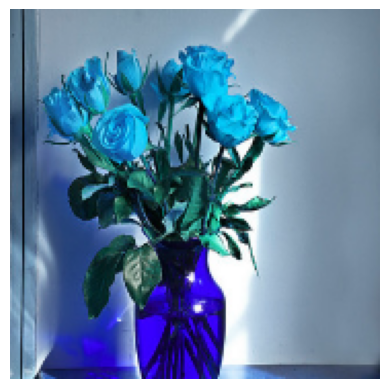

In [19]:
# We will compare our images with normal ones and the augmented ones

# Normal one
plt.axis('off')
plt.imshow(X[0])

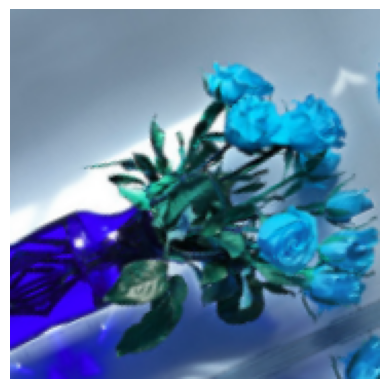

In [20]:
# Augmented one
plt.axis('off')
# We cannot directly show our image That's why we need to convert it into a numpy array
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [26]:
# We will again make our model


num_classes=5
model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

# we will compile our model here and use SparseCategoricalCrossentropy for direct values

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 12s 118ms/step - loss: 1.4816 - accuracy: 0.3565
Epoch 2/30
86/86 [==============================] - 10s 119ms/step - loss: 1.1125 - accuracy: 0.5520
Epoch 3/30
86/86 [==============================] - 10s 121ms/step - loss: 0.9822 - accuracy: 0.6166
Epoch 4/30
86/86 [==============================] - 10s 119ms/step - loss: 0.9379 - accuracy: 0.6301
Epoch 5/30
86/86 [==============================] - 10s 116ms/step - loss: 0.8997 - accuracy: 0.6421
Epoch 6/30
86/86 [==============================] - 10s 118ms/step - loss: 0.8242 - accuracy: 0.6781
Epoch 7/30
86/86 [==============================] - 10s 119ms/step - loss: 0.7970 - accuracy: 0.6930
Epoch 8/30
86/86 [==============================] - 10s 119ms/step - loss: 0.7713 - accuracy: 0.6999
Epoch 9/30
86/86 [==============================] - 10s 119ms/step - loss: 0.7538 - accuracy: 0.7140
Epoch 10/30
86/86 [==============================] - 10s 118ms/step - loss: 0.7123 - accura

In [27]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 25ms/step - loss: 10.6834 - accuracy: 0.5926


[10.683384895324707, 0.5925925970077515]